# **A: Analyse the tuning time per parameter combination for all models in the TSP**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

# Load the Data Frame
df = pd.read_excel("c_TSP_tuning_details.xlsx")
df = df.set_index("Unnamed: 0")
df.index.name = None
df

,KNN,Ridge,DT,RF,GBRT,XGBoost,SVM,KM,NN
Search type,GridSearchCV,GridSearchCV,RandomizedSearchCV,RandomizedSearchCV,RandomizedSearchCV,GridSearchCV,GridSearchCV,GridSearchCV,GridSearchCV
Parameter combinations,12,5,50,50,25,9,24,36,120
Total tuning time,"1m, 16s",1s,"1m, 15s","25m, 32s","34m, 7s",3s,"1m, 52s","43m, 23s","2h, 57m"
Total tuning fit time,1s,4s,"4m, 7s","1h, 38m","2h, 9m",8s,"6m, 22s","1h, 46m","11h, 42m"
Total tuning prediction time,"4m, 22s",0s,3s,20s,10s,0s,2s,"1h, 2m",24s


### **Convert the time string into seconds**

In [2]:
# Get all the stime strings
tuning_times = df.loc["Total tuning time"]
tuning_times

KNN         1m, 16s
Ridge            1s
DT          1m, 15s
RF         25m, 32s
GBRT        34m, 7s
XGBoost          3s
SVM         1m, 52s
KM         43m, 23s
NN          2h, 57m
Name: Total tuning time, dtype: object

In [3]:
# Function to convert the time in strings back into a number of seconds
def fun_convert_string_to_seconds(string):
    # Check if the string has hours
    if ("h" in string):
        # Get the hours of the string
        h_loc = [letter == "h" for letter in string].index(True)
        hours = int(string[:h_loc])

        # Get the minutes of the string
        m_loc = [letter == "m" for letter in string].index(True)
        minutes = int(string[h_loc+3:m_loc])

        # Get the seconds of the string
        seconds = 0

    # Check if the string has minutes
    elif ("m" in string):
        # Get the hours of the string
        hours = 0

        # Get the minutes of the string
        m_loc = [letter == "m" for letter in string].index(True)
        minutes = int(string[:m_loc])

        # Get the seconds of the string
        s_loc = [letter == "s" for letter in string].index(True)
        seconds = int(string[m_loc+3:s_loc])

    else:
        # Get the hours and minutes of the string
        hours, minutes = 0, 0

        # Get the seconds of the string
        s_loc = [letter == "s" for letter in string].index(True)
        seconds = int(string[:s_loc])

    # Compute the total time in seconds
    total_time_in_sec = hours * 60**2 + minutes * 60 + seconds
    print(f"There are {total_time_in_sec:<5} Seconds in {string}.")
    #print(hours, minutes, seconds, total_time_in_sec)
    return total_time_in_sec

# Apply the function and append the seconds per model to the list
seconds_list = []
for string in tuning_times: 
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Total tuning time in seconds"] = seconds_list

# Compute the tuning time per parameter combination for all models as a new row
df.loc["Tuning time per parameter combination"] = df.loc["Total tuning time in seconds"] / df.loc["Parameter combinations"]
df

There are 76    Seconds in 1m, 16s.
There are 1     Seconds in 1s.
There are 75    Seconds in 1m, 15s.
There are 1532  Seconds in 25m, 32s.
There are 2047  Seconds in 34m, 7s.
There are 3     Seconds in 3s.
There are 112   Seconds in 1m, 52s.
There are 2603  Seconds in 43m, 23s.
There are 10620 Seconds in 2h, 57m.


,KNN,Ridge,DT,RF,GBRT,XGBoost,SVM,KM,NN
Search type,GridSearchCV,GridSearchCV,RandomizedSearchCV,RandomizedSearchCV,RandomizedSearchCV,GridSearchCV,GridSearchCV,GridSearchCV,GridSearchCV
Parameter combinations,12,5,50,50,25,9,24,36,120
Total tuning time,"1m, 16s",1s,"1m, 15s","25m, 32s","34m, 7s",3s,"1m, 52s","43m, 23s","2h, 57m"
Total tuning fit time,1s,4s,"4m, 7s","1h, 38m","2h, 9m",8s,"6m, 22s","1h, 46m","11h, 42m"
Total tuning prediction time,"4m, 22s",0s,3s,20s,10s,0s,2s,"1h, 2m",24s
Total tuning time in seconds,76,1,75,1532,2047,3,112,2603,10620
Tuning time per parameter combination,6.333333,0.2,1.5,30.64,81.88,0.333333,4.666667,72.305556,88.5


### **Rename the models**

In [4]:
# Sort the values
time_per_comb = df.loc["Tuning time per parameter combination"].sort_values()
display(time_per_comb)

# Adjust the model names
names_dict = {"Ridge": "Ridge",
              "DT": "Decision Tree",
              "SVM": "SVM", 
              "KNN": "KNN",
              "XGBoost": "XGBoost", 
              "RF": "Random Forest",
              "KM": "Kernel Machine", 
              "GBRT": "GBRT",
              "NN": "Neural Network"}

time_per_comb.index = [names_dict[name] for name in list(time_per_comb.index)]
time_per_comb

Ridge            0.2
XGBoost     0.333333
DT               1.5
SVM         4.666667
KNN         6.333333
RF             30.64
KM         72.305556
GBRT           81.88
NN              88.5
Name: Tuning time per parameter combination, dtype: object

Ridge                   0.2
XGBoost            0.333333
Decision Tree           1.5
SVM                4.666667
KNN                6.333333
Random Forest         30.64
Kernel Machine    72.305556
GBRT                  81.88
Neural Network         88.5
Name: Tuning time per parameter combination, dtype: object

### **Create a plot**

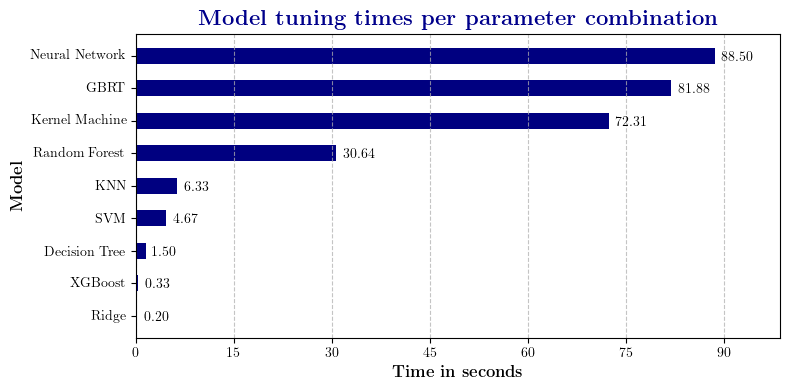

In [5]:
# Set LaTeX style fonts in matplotlib
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("text", usetex=True)
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

# Visualize scores of selected features
plt.figure(figsize=(8, 4))
bars = plt.barh(y=time_per_comb.index, width=time_per_comb, height=0.5, color="navy")

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{Time in seconds}", size=12)
plt.ylabel(r"\textbf{Model}", size=12)
plt.title(r"\textbf{Model tuning times per parameter combination}", size=16, color="darkblue")
plt.xticks(np.arange(start=0, stop=max(time_per_comb)+15, step=15))
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Annotate the bars with F-Test score values
for bar in bars:
    plt.text(
        bar.get_width() + 1, 
        bar.get_y() + bar.get_height() / 2.5, 
        f"{bar.get_width():.2f}", 
        va="center", ha="left", fontsize=10, color="black")

# Increase x-axis limit to give extra space
plt.xlim(left=0, right=max(time_per_comb) + 10)

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Save the plot as a PNG file with high quality
plt.savefig("../06_graphics/model_tuning_times_per_parameter_combination.png", bbox_inches="tight", dpi=500)
plt.show()

# **B: Analyse the fit and prediction time of the final configuration for all models in the TSP**

In [6]:
# Load the Data Frame
df = pd.read_excel("../04_test_results/TSP_results.xlsx")
df = df.set_index("Unnamed: 0")
df.index.name = None
df

,KNN,Linear Regression,Ridge Regression,Polynomial Regression,Decision Tree,Random Forest,GBRT,XGBoost,SVM,Kernel Machine,Neural Network
CV times,27s,3s,3s,33s,2s,"4m, 20s","2m, 39s",24s,31s,"4m, 57s","17m, 6s"
Fit times,0s,0s,0s,18s,2s,"2m, 26s","2m, 57s",8s,50s,"6m, 17s","27m, 2s"
Prediction times,2s,0s,0s,0s,0s,0s,0s,0s,0s,23s,0s


### **Convert the time string into seconds**

In [7]:
# Get all the stime strings
fit_times = df.loc["Fit times"]
predict_times = df.loc["Prediction times"]

In [8]:
# Apply the function and append the seconds per model to the list
seconds_list = []
for string in fit_times:
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Fit times in seconds"] = seconds_list
df.loc["Fit times in minutes"] = [value / 60 for value in seconds_list]

# Apply the function and append the seconds per model to the list
seconds_list = []
for string in predict_times:
    seconds_list.append(fun_convert_string_to_seconds(string))

# Add the list as new row to the Data Frame
df.loc["Prediction times in minutes"] = [value / 60 for value in seconds_list]
df

There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 18    Seconds in 18s.
There are 2     Seconds in 2s.
There are 146   Seconds in 2m, 26s.
There are 177   Seconds in 2m, 57s.
There are 8     Seconds in 8s.
There are 50    Seconds in 50s.
There are 377   Seconds in 6m, 17s.
There are 1622  Seconds in 27m, 2s.
There are 2     Seconds in 2s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 0     Seconds in 0s.
There are 23    Seconds in 23s.
There are 0     Seconds in 0s.


,KNN,Linear Regression,Ridge Regression,Polynomial Regression,Decision Tree,Random Forest,GBRT,XGBoost,SVM,Kernel Machine,Neural Network
CV times,27s,3s,3s,33s,2s,"4m, 20s","2m, 39s",24s,31s,"4m, 57s","17m, 6s"
Fit times,0s,0s,0s,18s,2s,"2m, 26s","2m, 57s",8s,50s,"6m, 17s","27m, 2s"
Prediction times,2s,0s,0s,0s,0s,0s,0s,0s,0s,23s,0s
Fit times in seconds,0,0,0,18,2,146,177,8,50,377,1622
Fit times in minutes,0.0,0.0,0.0,0.3,0.033333,2.433333,2.95,0.133333,0.833333,6.283333,27.033333
Prediction times in minutes,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383333,0.0


### **Rename the models**

In [9]:
# Sort the values
fit_times_in_min = df.loc["Fit times in minutes"].sort_values()
display(fit_times_in_min)

KNN                            0.0
Linear Regression              0.0
Ridge Regression               0.0
Decision Tree             0.033333
XGBoost                   0.133333
Polynomial Regression          0.3
SVM                       0.833333
Random Forest             2.433333
GBRT                          2.95
Kernel Machine            6.283333
Neural Network           27.033333
Name: Fit times in minutes, dtype: object

### **Create a plot**

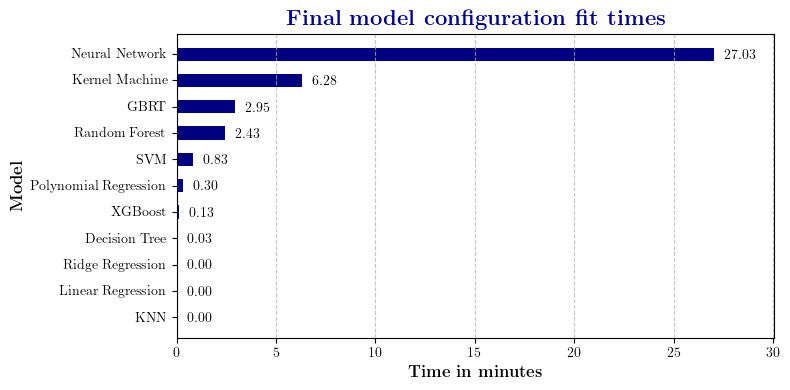

In [10]:
# Set LaTeX style fonts in matplotlib
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("text", usetex=True)
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

# Visualize scores of selected features
plt.figure(figsize=(8, 4))
bars = plt.barh(y=fit_times_in_min.index, width=fit_times_in_min, height=0.5, color="navy")

# Use LaTeX commands for bold text in the title and labels
plt.xlabel(r"\textbf{Time in minutes}", size=12)
plt.ylabel(r"\textbf{Model}", size=12)
plt.title(r"\textbf{Final model configuration fit times}", size=16, color="darkblue")
plt.grid(axis="x", linestyle="--", alpha=0.75)

# Annotate the bars with F-Test score values
for bar in bars:
    plt.text(
        bar.get_width() + 0.5, 
        bar.get_y() + bar.get_height() / 2.5, 
        f"{bar.get_width():.2f}", 
        va="center", ha="left", fontsize=10, color="black")

# Increase x-axis limit to give extra space
plt.xlim(left=0, right=max(fit_times_in_min) + 3)

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Save the plot as a PNG file with high quality
plt.savefig("../06_graphics/final_model_configuration_fit_times.png", bbox_inches="tight", dpi=500)
plt.show()

In [11]:
# Set matplotlib style fonts to default again
plt.rcdefaults()